In [18]:
import sklearn
from sklearn import svm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 数据集处理

## 读取数据

使用鸢尾花数据集

In [5]:
def iris_label(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


path = './iris.data'
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_label})

## 划分训练集、测试集

In [9]:
x, y = np.split(data, indices_or_sections=(4, ), axis=1)
x = x[:, 0:2]  #为便于后边画图显示，只选取前两维度。若不用画图，可选取前四列x[:,0:4]
train_data, test_data, train_label, test_label = sklearn.model_selection.train_test_split(
    x, y, random_state=1, train_size=0.6, test_size=0.4)

# 训练SVM

In [10]:
classifier = svm.SVC(C=2,
                     kernel='rbf',
                     gamma=10,
                     decision_function_shape='ovr')  # ovr:一对多策略
classifier.fit(train_data, train_label.ravel())

SVC(C=2, gamma=10)

# 计算准确率

## 直接计算

In [11]:
print("训练集：",classifier.score(train_data,train_label))
print("测试集：",classifier.score(test_data,test_label))

训练集： 0.8555555555555555
测试集： 0.7


## 使用accuracy_score函数

In [12]:
from sklearn.metrics import accuracy_score
tra_label=classifier.predict(train_data) #训练集的预测标签
tes_label=classifier.predict(test_data) #测试集的预测标签
print("训练集：", accuracy_score(train_label,tra_label) )
print("测试集：", accuracy_score(test_label,tes_label) )

训练集： 0.8555555555555555
测试集： 0.7


# 查看内部决策函数

显示的是样本到分类平面的距离

In [13]:
print('train_decision_function:',classifier.decision_function(train_data))
print('predict_result:',classifier.predict(train_data))

train_decision_function: [[ 2.22308592  0.84616841 -0.17947608]
 [-0.2225123   2.2071765   1.08924729]
 [-0.2242179   1.07937608  2.21178139]
 [ 2.22223582  0.83797673 -0.17109399]
 [ 2.22386153  0.8446035  -0.17983668]
 [-0.22089479  0.98227728  2.22298496]
 [ 2.22220938  0.84699664 -0.17838033]
 [-0.22103052  2.20266299  1.09813055]
 [-0.20671804  0.8504463   2.23661442]
 [-0.22496875  1.11829364  2.20136897]
 [-0.22872124  2.22475971  1.03471748]
 [-0.20603407  0.90792604  2.22222742]
 [-0.22463211  2.21744465  1.05326508]
 [ 2.22223034  0.8469462  -0.17838384]
 [-0.18653362  2.22221038  0.85945491]
 [-0.22250331  1.05689863  2.21436127]
 [-0.22089479  0.98227728  2.22298496]
 [-0.21654784  2.22813805  0.92025351]
 [-0.19539985  0.8454045   2.2317554 ]
 [-0.21119823  2.22222188  0.92897426]
 [ 2.22222331  0.84837192 -0.17940832]
 [ 2.23012971  0.83469888 -0.18492888]
 [ 2.22222523  0.84698189 -0.17840026]
 [-0.20603407  0.90792604  2.22222742]
 [ 2.22813517  0.83838682 -0.18368743]


# 绘制图像

In [17]:
#5.绘制图形
#确定坐标轴范围
x1_min, x1_max=x[:,0].min(), x[:,0].max() #第0维特征的范围
x2_min, x2_max=x[:,1].min(), x[:,1].max() #第1维特征的范围
x1,x2=np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j ] #生成网络采样点
grid_test=np.stack((x1.flat,x2.flat) ,axis=1) #测试点
#指定默认字体
matplotlib.rcParams['font.sans-serif']=['SimHei']
#设置颜色
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'] )
 
grid_hat = classifier.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

<ipython-input-19-8108de3a520f>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示


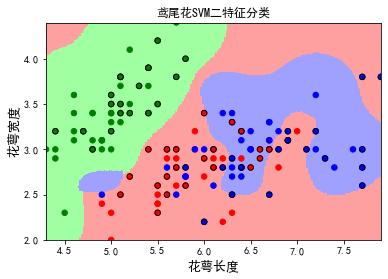

In [19]:
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)  # 样本
plt.scatter(test_data[:,0],test_data[:,1], c=test_label[:,0],s=30,edgecolors='k', zorder=2,cmap=cm_dark) #圈中测试集样本点
plt.xlabel('花萼长度', fontsize=13)
plt.ylabel('花萼宽度', fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('鸢尾花SVM二特征分类')
plt.show()

# 对比神经网络

In [79]:
x, y = np.split(data, indices_or_sections=(4, ), axis=1)
train_data, test_data, train_label, test_label = sklearn.model_selection.train_test_split(
    x, y, random_state=1, train_size=0.8, test_size=0.2)

In [29]:
my_svm = svm.SVC(C=2,
                     kernel='rbf',
                     gamma=10,
                     decision_function_shape='ovr')  # ovr:一对多策略
my_svm.fit(train_data, train_label.ravel())

SVC(C=2, gamma=10)

In [31]:
print("训练集：",my_svm.score(train_data,train_label))
print("测试集：",my_svm.score(test_data,test_label))

训练集： 1.0
测试集： 0.9333333333333333


In [113]:
import torch
from torch import nn
from torch.nn import functional
from torch import optim

In [171]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 10)
        self.fc4 = nn.Linear(10, 3)

    def forward(self, inputs):
        x = functional.relu(self.fc1(inputs))
        x = functional.relu(self.fc2(x))
        x = functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x


device = torch.device("cuda:0")
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)

In [172]:
train_data_tensor = torch.from_numpy(train_data.astype(np.float32))
train_label_tensor = torch.from_numpy(train_label.reshape(train_label.shape[0]).astype(np.int64))

dataset = torch.utils.data.TensorDataset(train_data_tensor, train_label_tensor)
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=8,
                                          shuffle=True,
                                          num_workers=2)

In [174]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

for step in range(200):
    for i, data in enumerate(data_loader):
        inputs, label = data
        optimizer.zero_grad()
        out = net(inputs.to(device))
        loss = criterion(out.to(device), label.to(device))
        loss.backward()
        optimizer.step()
        if (i % 10 == 9):
            print("epoch=%d loss=%f" % (step, loss))

epoch=0 loss=0.002449
epoch=1 loss=0.005750
epoch=2 loss=0.005574
epoch=3 loss=0.132550
epoch=4 loss=0.002536
epoch=5 loss=0.001627
epoch=6 loss=0.008880
epoch=7 loss=0.042198
epoch=8 loss=0.001475
epoch=9 loss=0.001468
epoch=10 loss=0.068746
epoch=11 loss=0.001093
epoch=12 loss=0.376727
epoch=13 loss=0.023637
epoch=14 loss=0.095205
epoch=15 loss=0.061011
epoch=16 loss=0.040224
epoch=17 loss=0.002585
epoch=18 loss=0.002909
epoch=19 loss=0.146559
epoch=20 loss=0.006752
epoch=21 loss=0.045587
epoch=22 loss=0.006663
epoch=23 loss=0.332735
epoch=24 loss=0.276454
epoch=25 loss=0.004833
epoch=26 loss=0.346213
epoch=27 loss=0.010260
epoch=28 loss=0.000552
epoch=29 loss=0.018528
epoch=30 loss=0.003725
epoch=31 loss=0.041997
epoch=32 loss=0.074331
epoch=33 loss=0.003109
epoch=34 loss=0.008400
epoch=35 loss=0.003537
epoch=36 loss=0.047681
epoch=37 loss=0.097895
epoch=38 loss=0.090904
epoch=39 loss=0.006847
epoch=40 loss=0.002539
epoch=41 loss=0.019041
epoch=42 loss=0.111784
epoch=43 loss=0.00217

In [175]:
test_data_tensor = torch.from_numpy(test_data.astype(np.float32))
test_label_tensor = torch.from_numpy(test_label.reshape(test_label.shape[0]).astype(np.int64))

def accuracy(datas,labels):
    n = len(datas)
    t = 0
    for data,label in zip(datas, labels):
        predict = torch.argmax(net(data.to(device)))
        if predict.item() == label.item():
            t +=1
    return t / n

acc = accuracy(test_data_tensor, test_label_tensor)
print(acc)

1.0
